In [ ]:
import pandas as pd
df = pd.read_csv ("https://raw.githubusercontent.com/ximedav/Estadistica/refs/heads/main/Churn_Modelling.csv")
df.dropna(inplace = True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


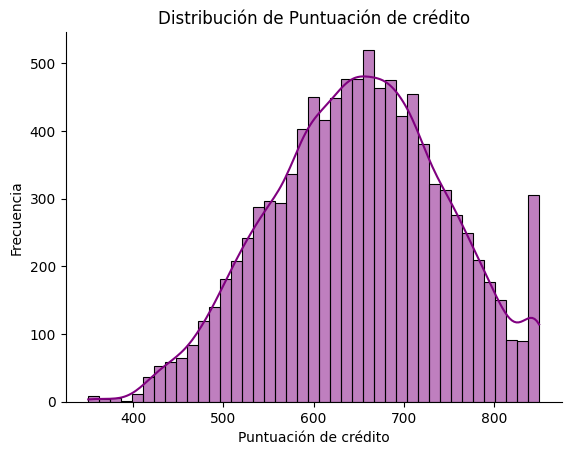

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CreditScore'], kde = True, color = 'purple')

plt.xlabel('Puntuación de crédito')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuación de crédito')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# esta variable esta bien

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(Geography)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
# anova se utiliza cuando los valores son pocos y no varian mucho entre ellos

,df,sum_sq,mean_sq,F,PR(>F)
C(Geography),2.0,3.782055e+09,1.891028e+09,0.571689,0.56459
Residual,9995.0,3.306138e+13,3.307792e+09,NaN,NaN


In [ ]:
df.drop(columns=['Geography'], inplace=True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...
9997,709,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(Gender)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,2.021718e+09,2.021718e+09,0.611227,0.434345
Residual,9996.0,3.306314e+13,3.307637e+09,NaN,NaN


In [ ]:
df.drop(columns=['Gender'], inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


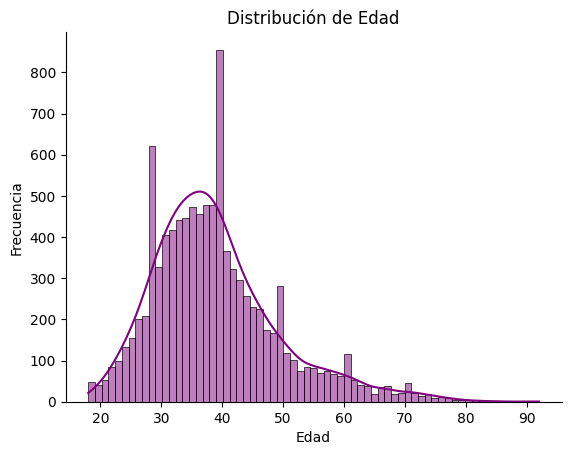

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde = True, color = 'purple')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
df['Tenure'].unique()

array([ 2,  1,  8,  4,  6,  3, 10,  5,  7,  9,  0])

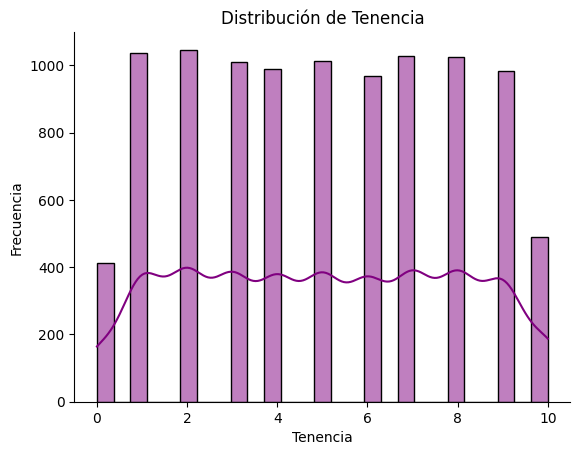

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tenure'], kde = True, color = 'purple')

plt.xlabel('Tenencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tenencia')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

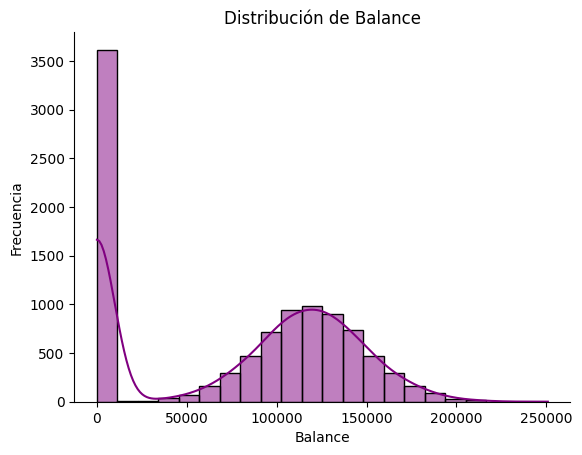

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Balance'], kde = True, color = 'purple')

plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.title('Distribución de Balance')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
df=df.loc[df["Balance"]!= 0,:]
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,376,29.0,4,115046.74,4,1.0,0.0,119346.88,1
10,528,31.0,6,102016.72,2,0.0,0.0,80181.12,0
...,...,...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


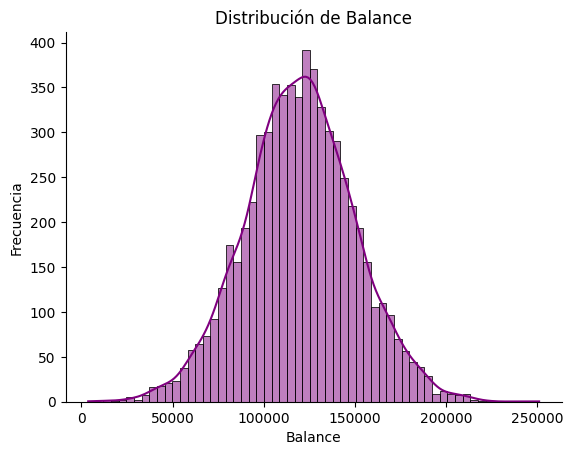

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Balance'], kde = True, color = 'purple')

plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.title('Distribución de Balance')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(NumOfProducts)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
# valor muy alto de P, se elimina la columna

,df,sum_sq,mean_sq,F,PR(>F)
C(NumOfProducts),3.0,1.666167e+10,5.553889e+09,1.68695,0.16751
Residual,6378.0,2.099808e+13,3.292267e+09,NaN,NaN


In [ ]:
df.drop(columns=['NumOfProducts'], inplace=True)
df

<ipython-input-55-9f13922b87fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['NumOfProducts'], inplace=True)


,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,1.0,0.0,113931.57,1
5,645,44.0,8,113755.78,1.0,0.0,149756.71,1
7,376,29.0,4,115046.74,1.0,0.0,119346.88,1
10,528,31.0,6,102016.72,0.0,0.0,80181.12,0
...,...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1.0,1.0,101699.77,0
9998,772,42.0,3,75075.31,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1.0,0.0,38190.78,0


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(HasCrCard)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(HasCrCard),1.0,4.315124e+08,4.315124e+08,0.131008,0.717401
Residual,6380.0,2.101431e+13,3.293778e+09,NaN,NaN


In [ ]:
df.drop(columns=['HasCrCard'], inplace=True)
df

<ipython-input-58-4a488eb8acee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['HasCrCard'], inplace=True)


,CreditScore,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Exited
1,608,41.0,1,83807.86,1.0,112542.58,0
2,502,42.0,8,159660.80,0.0,113931.57,1
5,645,44.0,8,113755.78,0.0,149756.71,1
7,376,29.0,4,115046.74,0.0,119346.88,1
10,528,31.0,6,102016.72,0.0,80181.12,0
...,...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,1.0,101699.77,0
9998,772,42.0,3,75075.31,0.0,92888.52,1
9999,772,42.0,3,75075.31,0.0,92888.52,1
10000,792,28.0,4,130142.79,0.0,38190.78,0


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(IsActiveMember)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
#se elimina x valor grande

,df,sum_sq,mean_sq,F,PR(>F)
C(IsActiveMember),1.0,3.677991e+09,3.677991e+09,1.116821,0.290644
Residual,6380.0,2.101106e+13,3.293270e+09,NaN,NaN


In [ ]:
df.drop(columns=['IsActiveMember'], inplace=True)
df

<ipython-input-61-c52caf2ab3b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['IsActiveMember'], inplace=True)


,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
1,608,41.0,1,83807.86,112542.58,0
2,502,42.0,8,159660.80,113931.57,1
5,645,44.0,8,113755.78,149756.71,1
7,376,29.0,4,115046.74,119346.88,1
10,528,31.0,6,102016.72,80181.12,0
...,...,...,...,...,...,...
9996,516,35.0,10,57369.61,101699.77,0
9998,772,42.0,3,75075.31,92888.52,1
9999,772,42.0,3,75075.31,92888.52,1
10000,792,28.0,4,130142.79,38190.78,0


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


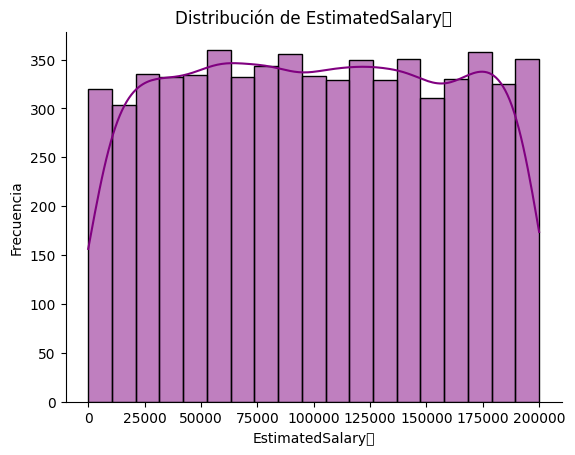

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['EstimatedSalary'], kde = True, color = 'purple')

plt.xlabel('EstimatedSalary	')
plt.ylabel('Frecuencia')
plt.title('Distribución de EstimatedSalary	')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('EstimatedSalary ~ C(Exited)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
# se acepta Ho

,df,sum_sq,mean_sq,F,PR(>F)
C(Exited),1.0,8.272243e+08,8.272243e+08,0.251152,0.616282
Residual,6380.0,2.101391e+13,3.293716e+09,NaN,NaN


In [ ]:
df.drop(columns=['Exited'], inplace=True)
df

<ipython-input-65-09fe02bf5bd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Exited'], inplace=True)


,CreditScore,Age,Tenure,Balance,EstimatedSalary
1,608,41.0,1,83807.86,112542.58
2,502,42.0,8,159660.80,113931.57
5,645,44.0,8,113755.78,149756.71
7,376,29.0,4,115046.74,119346.88
10,528,31.0,6,102016.72,80181.12
...,...,...,...,...,...
9996,516,35.0,10,57369.61,101699.77
9998,772,42.0,3,75075.31,92888.52
9999,772,42.0,3,75075.31,92888.52
10000,792,28.0,4,130142.79,38190.78


Text(0.5, 1.0, 'Matriz de correlacion')

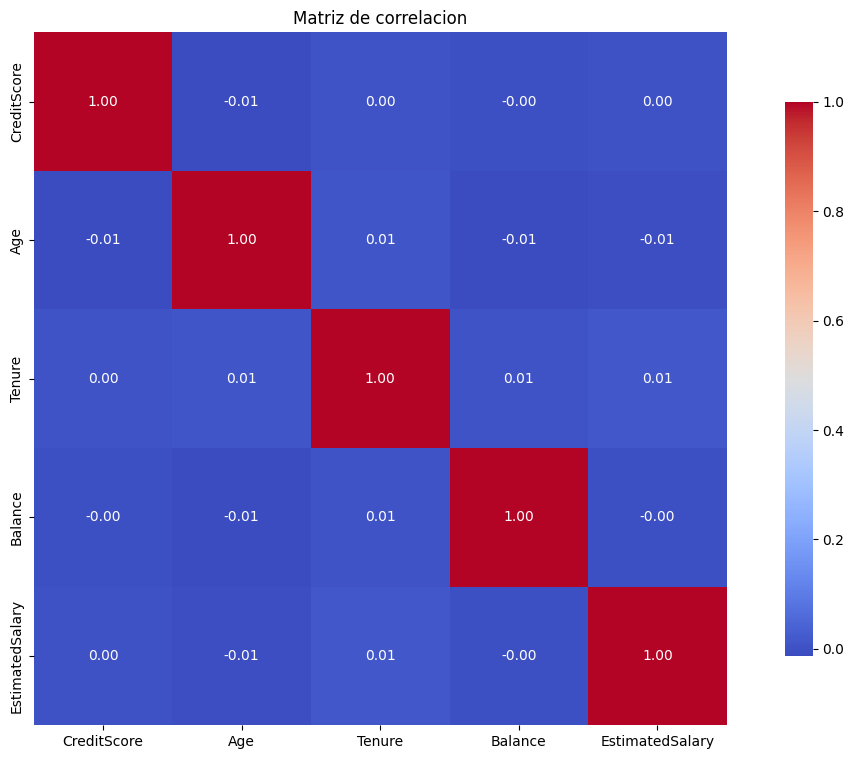

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de correlacion')
# Que el coeficiente de correlación entre el salario estimado
# No hay relación entre las variables, ya que todos los valores son muy bajos